In [1]:
from Utils import create_dist3_task, Logging
from Models.Reimplementation import Dist3ESBN, Dist3Transformer
import tensorflow as tf
import tensorboard
%load_ext tensorboard
%rm -rf ./logs/reimplementation/
tf.config.run_functions_eagerly(False)

In this notebook, we recreate the distribution-of-three experiment by (Webb 2023) using the ESBN. We will recreate the m=0 and the m=95 condition. 
Afterwards, we will see whether the key size can be reduced while retaining performance.
Task creation is similar to (Webb 2023).

In [2]:
# Experimental condition: m = 0
m_holdout = 0

# Set train parameters
batch_size = 32
train_set_size = 10000
train_proportion = 0.95

# Set test parameters
test_batch_size = 32
test_set_size = 10000


# Generate training and test sets
train_data, test_data = create_dist3_task.create_task(train_set_size, test_set_size, train_proportion, m_holdout)

2024-04-02 15:01:11.077818: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)


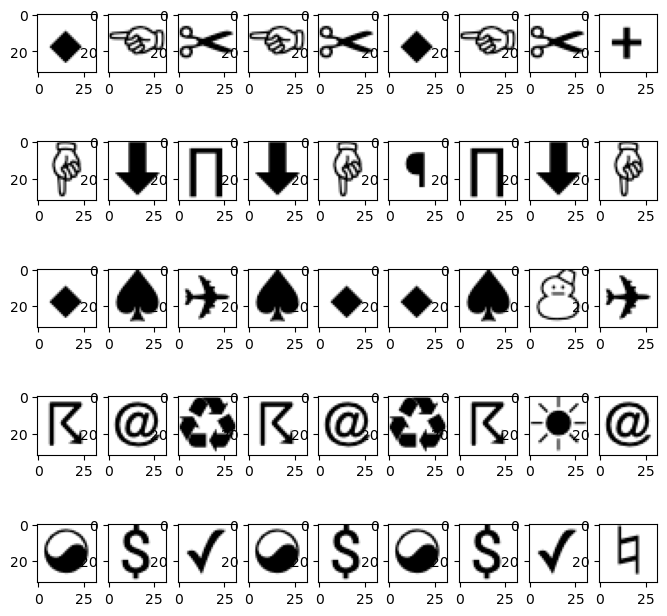

In [3]:
# Show samples of train and test data
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
columns = 9
rows = 5
i = 0
for (sequence, label) in train_data.take(5):
    for j in range(len(sequence[0])):
        img = sequence[0, j]
        fig.add_subplot(rows, columns, 9*i+j+1)
        plt.imshow(img, cmap='gray')
    print(label[0])
    i += 1
plt.show()

In [4]:
# Define model with parameters from original paper
z_size = 128
key_size = 256
hidden_size = 512

log_dir = "logs/reimplementation/fit/_m0"
model = Logging.BatchLoggingModel(Dist3ESBN(z_size, key_size, hidden_size), log_dir)
model.compile(optimizer="Adam",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(train_data, 
          epochs=10,
          validation_data=test_data,
          callbacks=[tensorboard_callback])

Epoch 1/10
312/312 [==============================] - 25s 74ms/step - loss: 0.3586 - accuracy: 0.8480 - val_loss: 0.1126 - val_accuracy: 0.9700
Epoch 2/10
312/312 [==============================] - 20s 64ms/step - loss: 0.1113 - accuracy: 0.9619 - val_loss: 0.1470 - val_accuracy: 0.9511
Epoch 3/10
312/312 [==============================] - 20s 65ms/step - loss: 0.1398 - accuracy: 0.9487 - val_loss: 0.1111 - val_accuracy: 0.9641
Epoch 4/10
312/312 [==============================] - 22s 70ms/step - loss: 0.1454 - accuracy: 0.9455 - val_loss: 0.1301 - val_accuracy: 0.9496
Epoch 5/10
312/312 [==============================] - 22s 70ms/step - loss: 0.1027 - accuracy: 0.9654 - val_loss: 0.0409 - val_accuracy: 0.9888
Epoch 6/10
312/312 [==============================] - 23s 73ms/step - loss: 0.0559 - accuracy: 0.9843 - val_loss: 0.0749 - val_accuracy: 0.9795
Epoch 7/10
312/312 [==============================] - 23s 75ms/step - loss: 0.0747 - accuracy: 0.9780 - val_loss: 0.0706 - val_accuracy:

In [5]:
# Experimental condition: m = 95
m_holdout = 95

# Set train parameters
batch_size = 32
train_set_size = 320
train_proportion = 0.95

# Set test parameters
test_batch_size = 32
test_set_size = 10000


# Generate training and test sets
train_data, test_data = create_dist3_task.create_task(train_set_size, test_set_size, train_proportion, m_holdout)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)


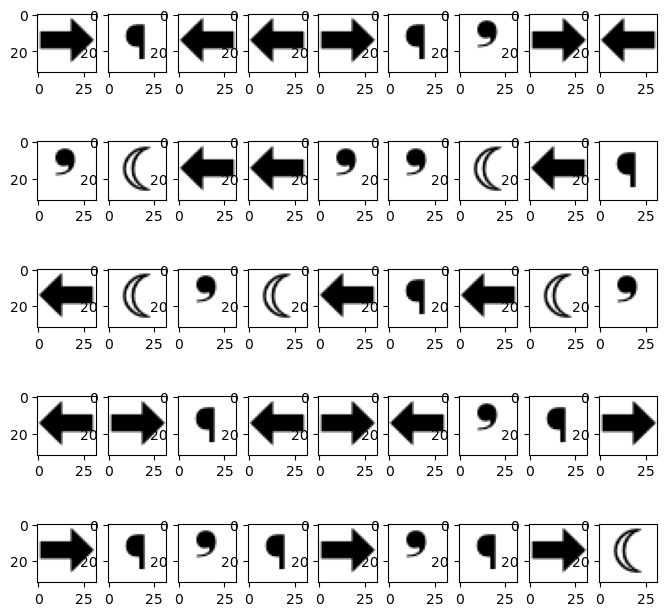

In [6]:
# Show samples of train and test data
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
columns = 9
rows = 5
i = 0
for (sequence, label) in train_data.take(5):
    for j in range(len(sequence[0])):
        img = sequence[0, j]
        fig.add_subplot(rows, columns, 9*i+j+1)
        plt.imshow(img, cmap='gray')
    print(label[0])
    i += 1
plt.show()

In [7]:
# Re-run m95 condition with different key sizes
for key_size in [256, 128, 64, 32, 16, 8, 4, 2, 1]:
    for i in range(10):
        z_size = 128
        hidden_size = 512

        log_dir = "logs/reimplementation/fit/" + f"_m95_key_{key_size}_run_{i}"
        model = Logging.BatchLoggingModel(Dist3ESBN(z_size, key_size, hidden_size), log_dir)
        model.compile(optimizer="Adam",
                    loss="sparse_categorical_crossentropy",
                    metrics=["accuracy"])

        tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

        model.fit(train_data, 
                epochs=20,
                validation_data=test_data,
                callbacks=[tensorboard_callback])

Epoch 1/20
10/10 [==============================] - 8s 696ms/step - loss: 1.3863 - accuracy: 0.2719 - val_loss: 1.3858 - val_accuracy: 0.2447
Epoch 2/20
10/10 [==============================] - 6s 694ms/step - loss: 1.3818 - accuracy: 0.2719 - val_loss: 1.3782 - val_accuracy: 0.2754
Epoch 3/20
10/10 [==============================] - 7s 744ms/step - loss: 1.3570 - accuracy: 0.2937 - val_loss: 1.3394 - val_accuracy: 0.3018
Epoch 4/20
10/10 [==============================] - 5s 603ms/step - loss: 1.2124 - accuracy: 0.5125 - val_loss: 1.0375 - val_accuracy: 0.5526
Epoch 5/20
10/10 [==============================] - 6s 709ms/step - loss: 0.6467 - accuracy: 0.7437 - val_loss: 0.7743 - val_accuracy: 0.7147
Epoch 6/20
10/10 [==============================] - 6s 634ms/step - loss: 0.3753 - accuracy: 0.8562 - val_loss: 0.2440 - val_accuracy: 0.9393
Epoch 7/20
10/10 [==============================] - 6s 639ms/step - loss: 0.0842 - accuracy: 0.9750 - val_loss: 0.1833 - val_accuracy: 0.9758
Epoch 

2024-04-02 17:17:32.251460: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1032 of 10000
2024-04-02 17:17:32.323520: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


10/10 [==============================] - 24s 3s/step - loss: 1.3790 - accuracy: 0.2750 - val_loss: 1.3807 - val_accuracy: 0.2446
Epoch 9/20
10/10 [==============================] - 4s 405ms/step - loss: 1.3620 - accuracy: 0.3531 - val_loss: 1.3504 - val_accuracy: 0.3805
Epoch 10/20
10/10 [==============================] - 6s 665ms/step - loss: 1.2518 - accuracy: 0.4656 - val_loss: 1.1234 - val_accuracy: 0.5203
Epoch 11/20
10/10 [==============================] - 4s 426ms/step - loss: 0.9197 - accuracy: 0.6281 - val_loss: 0.9265 - val_accuracy: 0.6216
Epoch 12/20
10/10 [==============================] - 4s 413ms/step - loss: 0.5674 - accuracy: 0.7781 - val_loss: 0.4617 - val_accuracy: 0.8194
Epoch 13/20
10/10 [==============================] - 4s 442ms/step - loss: 0.3784 - accuracy: 0.8719 - val_loss: 0.2945 - val_accuracy: 0.8850
Epoch 14/20
10/10 [==============================] - 4s 467ms/step - loss: 0.1924 - accuracy: 0.9344 - val_loss: 0.2469 - val_accuracy: 0.9118
Epoch 15/20
10